In [1]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager, Radar, grid

In [2]:
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

In [3]:
# parameter list
params = [
    "NP Goals", "NPxG", "Tiri", "NPxG/Tiro", "Tiri in Porta", "\nDistanza\nMedia di Tiro",
    "\nTocchi\nin Area", "\nDribbling\nRiusciti", "\nCorse\nProgressive", "\nPassaggi\nProgr. Ricevuti", "\nControlli\nSbagliati", "\nPalloni\nPersi",
    "\nPassaggi\nTentati", "\nxAssist Gol", "Shot Creating\nActions\n",
    "% Duelli Aerei\nVinti\n", "Spazzate\n", "Tackle\n nel 3° off.\n"
]

slice_colors = ["#1E88E5"] * 6 + ["#FFC107"] * 6 + ["#D81B60"] * 3 + ["#004D40"] * 3
text_colors = ["#000000"] * 12 + ["#F2F2F2"] * 6

In [4]:
def create_radar(values, position, player, goals, assists, mins, params=params, slice_colors=slice_colors, text_colors=text_colors):
    
    # color for the slices and text
    #slice_colors = ["#1E88E5"] * 6 + ["#FFC107"] * 6 + ["#D81B60"] * 3 + ["#004D40"] * 3
    #text_colors = ["#000000"] * 12 + ["#F2F2F2"] * 6


    # instantiate PyPizza class
    baker = PyPizza(
        params=params,                  # list of parameters
        background_color="#EBEBE9",     # background color
        straight_line_color="#EBEBE9",  # color for straight lines
        straight_line_lw=1,             # linewidth for straight lines
        last_circle_lw=0,               # linewidth of last circle
        other_circle_lw=0,              # linewidth for other circles
        inner_circle_size=20            # size of inner circle
    )

    # plot pizza
    fig, ax = baker.make_pizza(
        values,                          # list of values
        figsize=(8, 8.5),                # adjust figsize according to your need
        color_blank_space="same",        # use same color to fill blank space
        slice_colors=slice_colors,       # color for individual slices
        value_colors=text_colors,        # color for the value-text
        value_bck_colors=slice_colors,   # color for the blank spaces
        blank_alpha=0.4,                 # alpha for blank-space colors
        kwargs_slices=dict(
            edgecolor="#F2F2F2", zorder=2, linewidth=1
        ),                               # values to be used when plotting slices
        kwargs_params=dict(
            color="#000000", fontsize=13,
            fontproperties=font_bold.prop, va="center"
        ),                               # values to be used when adding parameter
        kwargs_values=dict(
            color="#000000", fontsize=11,
            fontproperties=font_normal.prop, zorder=3,
            bbox=dict(
                edgecolor="#000000", facecolor="cornflowerblue",
                boxstyle="round,pad=0.2", lw=1
            )
        )                                # values to be used when adding parameter-values
    )

    
    # add title
    fig.text(
        0.515, 0.94, player[0] + " " + player[1] + " - " + player[2], size=17,
        ha="center", fontproperties=font_bold.prop, color="#000000"
    )

    # add subtitle
    fig.text(
        0.515, 0.916,
        goals + " Gol, " + assists + " Assist, " + mins +" minuti giocati",
        size=15,
        ha="center", fontproperties=font_bold.prop, color="#000000"
    )
    '''
    # add subtitle
    fig.text(
        0.515, 0.930,
        "Rank Percentile vs " + position + " della Serie A | Stagione 2022-23",
        size=13,
        ha="center", fontproperties=font_bold.prop, color="#000000"
    )
    '''
    # add text
    fig.text(
        0.24, 0.975, "Attacco             Possesso            Passaggi           Difesa", size=13,
        fontproperties=font_bold.prop, color="#000000"
    )

    # add rectangles
    fig.patches.extend([
        plt.Rectangle(
            (0.21, 0.9745), 0.025, 0.021, fill=True, color="#1E88E5",
            transform=fig.transFigure, figure=fig
        ),
        plt.Rectangle(
            (0.362, 0.9745), 0.025, 0.021, fill=True, color="#FFC107",
            transform=fig.transFigure, figure=fig
        ),
        plt.Rectangle(
            (0.524, 0.9745), 0.025, 0.021, fill=True, color="#D81B60",
            transform=fig.transFigure, figure=fig
        ),
        plt.Rectangle(
            (0.68, 0.9745), 0.025, 0.021, fill=True, color="#004D40",
            transform=fig.transFigure, figure=fig
        ),
    ])

    
    plt.savefig(
        "figures/Players/Player_Radar_" + player[1] + ".png",
        dpi = 600,
        facecolor = "#EFE9E6",
        bbox_inches="tight",
        edgecolor="none",
        transparent = False
    )
    

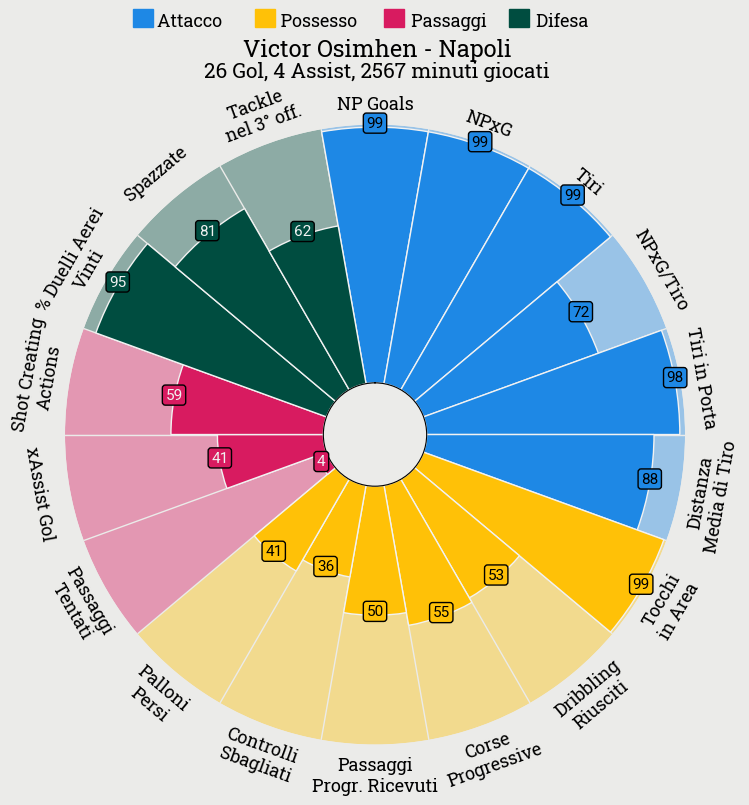

In [5]:
# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [
    99, 99, 99, 72, 98, 88,
    99, 53, 55, 50, 36, 41,
    4, 41, 59,
    95, 81, 62
]

create_radar(values, "Attaccanti", ["Victor", "Osimhen", "Napoli"], "26", "4", "2567", params, slice_colors, text_colors)

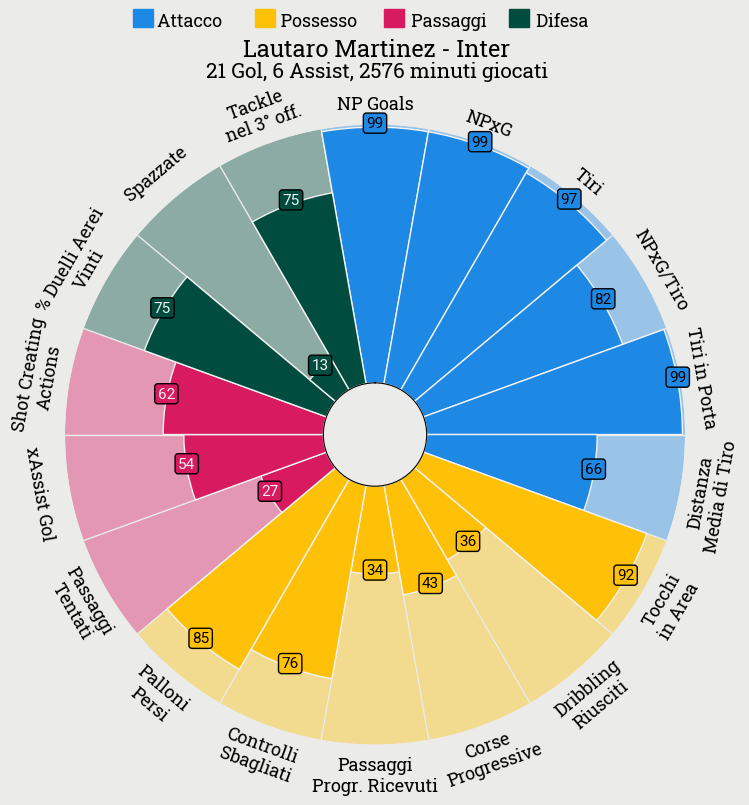

In [6]:
# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [
    99, 99, 97, 82, 99, 66,
    92, 36, 43, 34, 76, 85,
    27, 54, 62,
    75, 13, 75
]

create_radar(values, "Attaccanti", ["Lautaro", "Martinez", "Inter"], "21", "6","2576", params, slice_colors, text_colors)

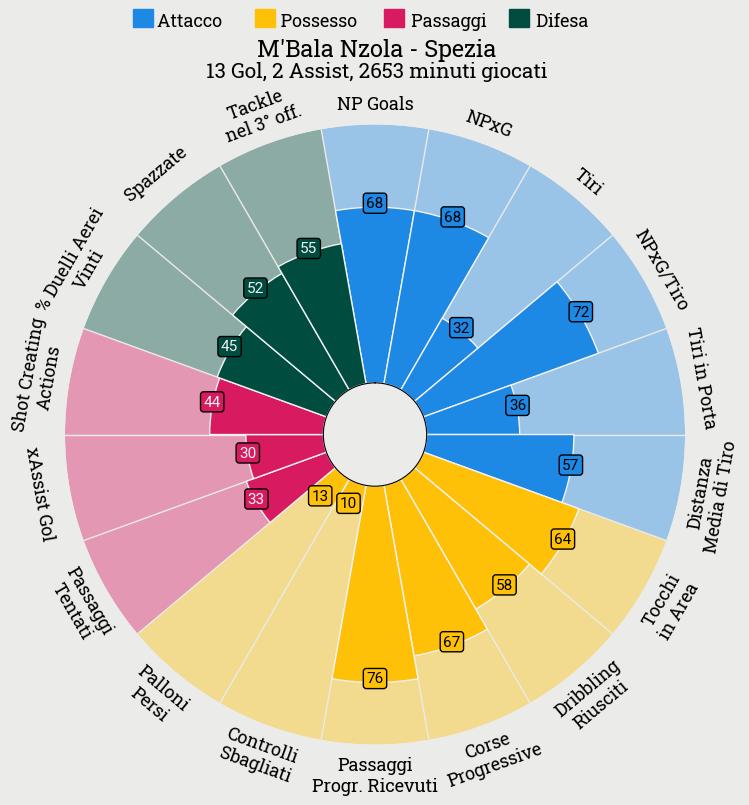

In [7]:

values = [
    68, 68, 32, 72, 36, 57,
    64, 58, 67, 76, 10, 13,
    33, 30, 44,
    45, 52, 55
]

create_radar(values, "Attaccanti", ["M'Bala", "Nzola", "Spezia"], "13", "2", "2653", params, slice_colors, text_colors)
                     

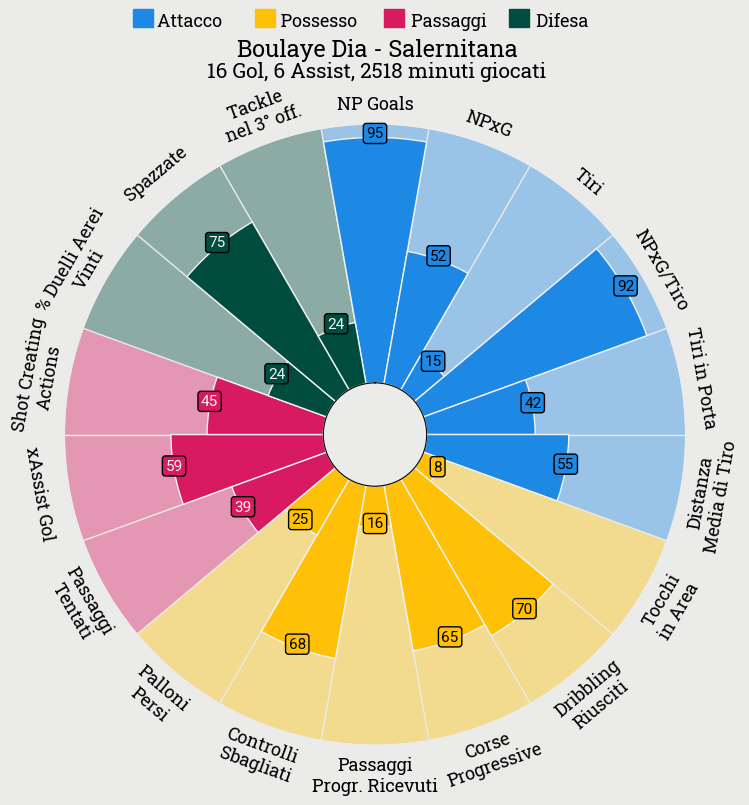

In [71]:

values = [
    95, 52, 15, 92, 42, 55,
    8, 70, 65, 16, 68, 25,
    39, 59, 45,
    24, 75, 24
]

create_radar(values, "Attaccanti", ["Boulaye", "Dia", "Salernitana"], "16", "6", "2518", params, slice_colors, text_colors)

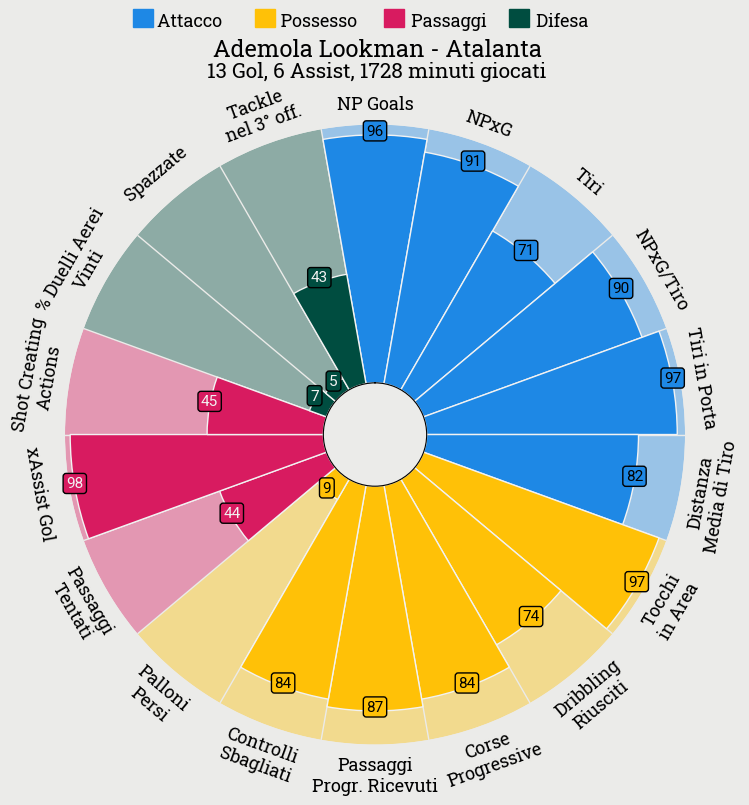

In [8]:
values = [
    96, 91, 71, 90, 97, 82,
    97, 74, 84, 87, 84, 9,
    44, 98, 45,
    7, 5, 43
]

create_radar(values, "Ali/Attaccanti", ["Ademola", "Lookman", "Atalanta"], "13", "6", "1728", params, slice_colors, text_colors)

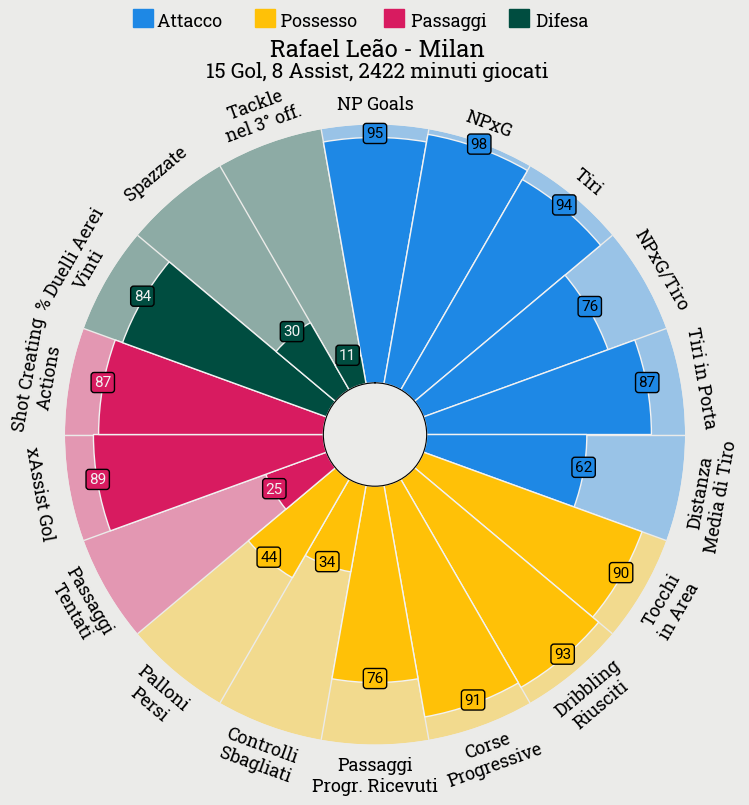

In [9]:
values = [
    95, 98, 94, 76, 87, 62,
    90, 93, 91, 76, 34, 44,
    25, 89, 87,
    84, 30, 11
]

create_radar(values, "Ali", ["Rafael", "Leão", "Milan"], "15", "8", "2422", params, slice_colors, text_colors)

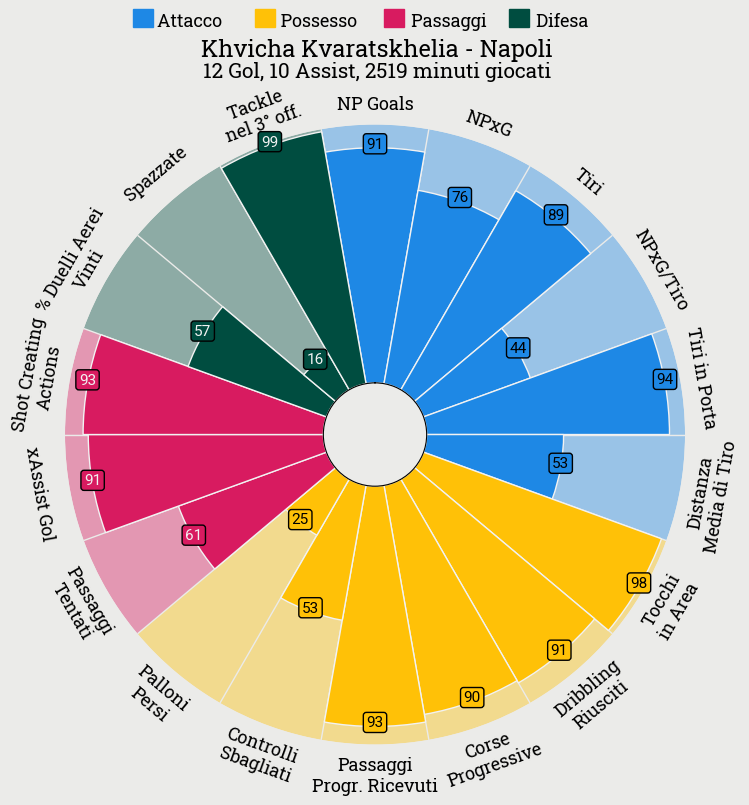

In [10]:
values = [
    91, 76, 89, 44, 94, 53,
    98, 91, 90, 93, 53, 25,
    61, 91, 93,
    57, 16, 99
]

create_radar(values, "Ali", ["Khvicha", "Kvaratskhelia", "Napoli"], "12", "10", "2519", params, slice_colors, text_colors)

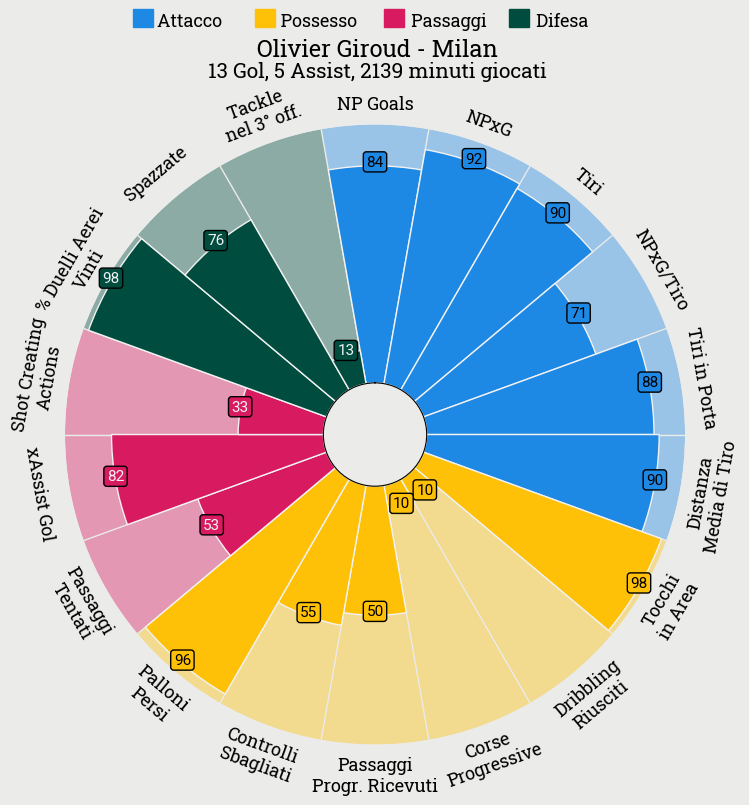

In [12]:
values = [
    84, 92, 90, 71, 88, 90,
    98, 10, 10, 50, 55, 96,
    53, 82, 33,
    98, 76, 13
]

create_radar(values, "Attaccanti", ["Olivier", "Giroud", "Milan"], "13", "5", "2139", params, slice_colors, text_colors)

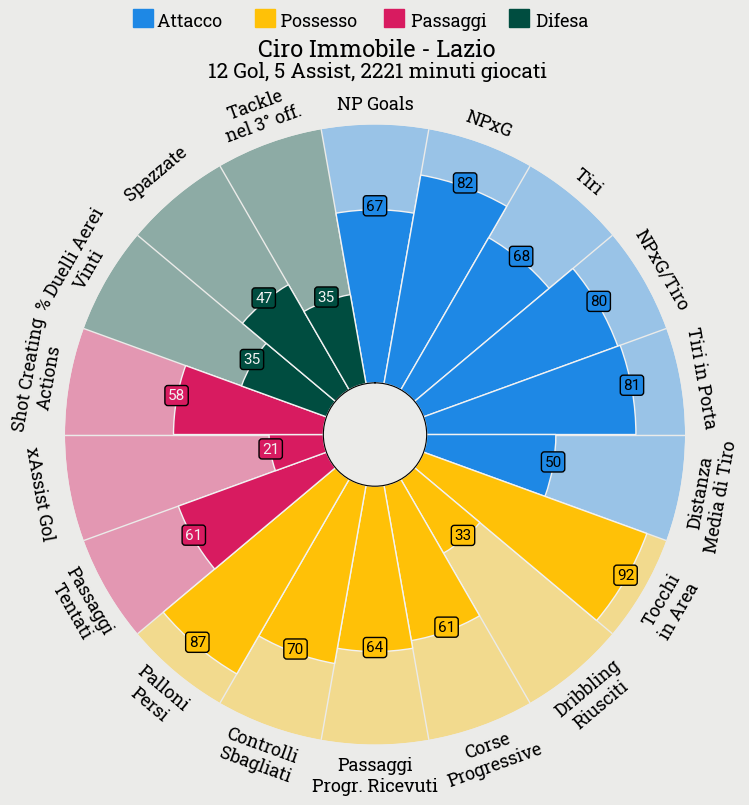

In [13]:
values = [
    67, 82, 68, 80, 81, 50,
    92, 33, 61, 64, 70, 87,
    61, 21, 58,
    35, 47, 35
]

create_radar(values, "Attaccanti", ["Ciro", "Immobile", "Lazio"], "12", "5", "2221", params, slice_colors, text_colors)

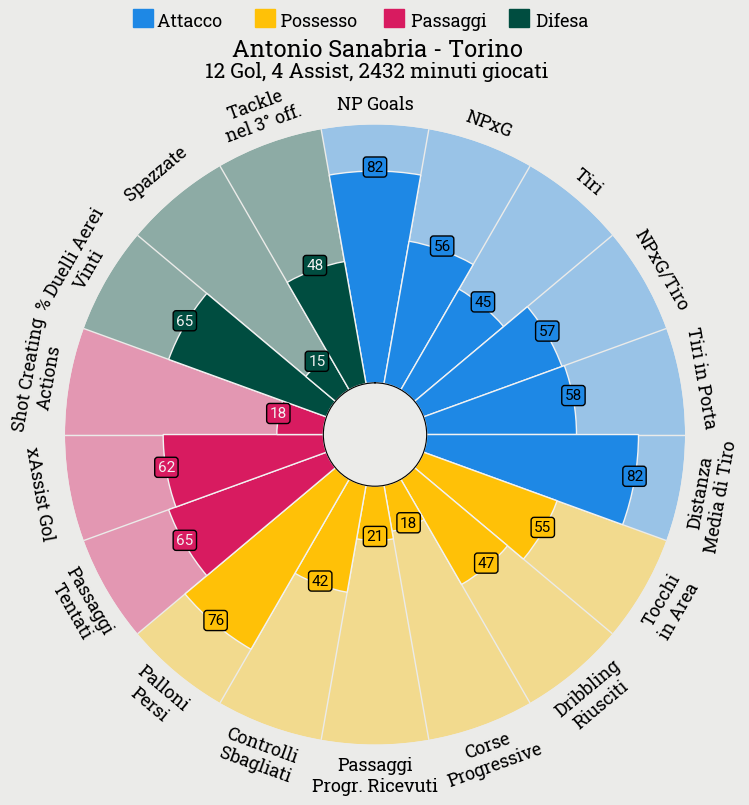

In [14]:
values = [
    82, 56, 45, 57, 58, 82,
    55, 47, 18, 21, 42, 76,
    65, 62, 18,
    65, 15, 48
]

create_radar(values, "Attaccanti", ["Antonio", "Sanabria", "Torino"], "12", "4", "2432", params, slice_colors, text_colors)

## Radar Ali

In [15]:

params = [
        "NPxG", "Tiri in Porta", "Tocchi in Area", "% Passaggi Riusciti",
        "xAssist Gol", "Falli Subiti", "Dribbling Riusciti", "Controlli Sbagliati",
        "Passaggi Chiave", "Filtranti", "Tackle+Intercetti", 
    ]

# The lower and upper boundaries for the statistics
low =  [0.08, 0.3, 2.0, 65, 0.1,  0.8, 0.7, 1, 0.8, 0.05, 0.3]
high = [0.45, 1.80, 5.5, 85, 0.5, 2.5, 3.0, 2.5, 2.2, 1.2, 2.2]

# Add anything to this list where having a lower number is better
# this flips the statistic
lower_is_better = ['Miscontrol']

In [16]:
kvara_values = [0.24, 1.11, 6.26, 79.1, 0.27, 1.59, 2.74, 2.26, 1.89, 0.41, 1.67]
leao_values =  [0.37, 1.04, 5.37, 70.7, 0.27, 1.04, 2.86, 2.55, 1.85, 0.19, 0.77]

In [17]:
radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [18]:
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

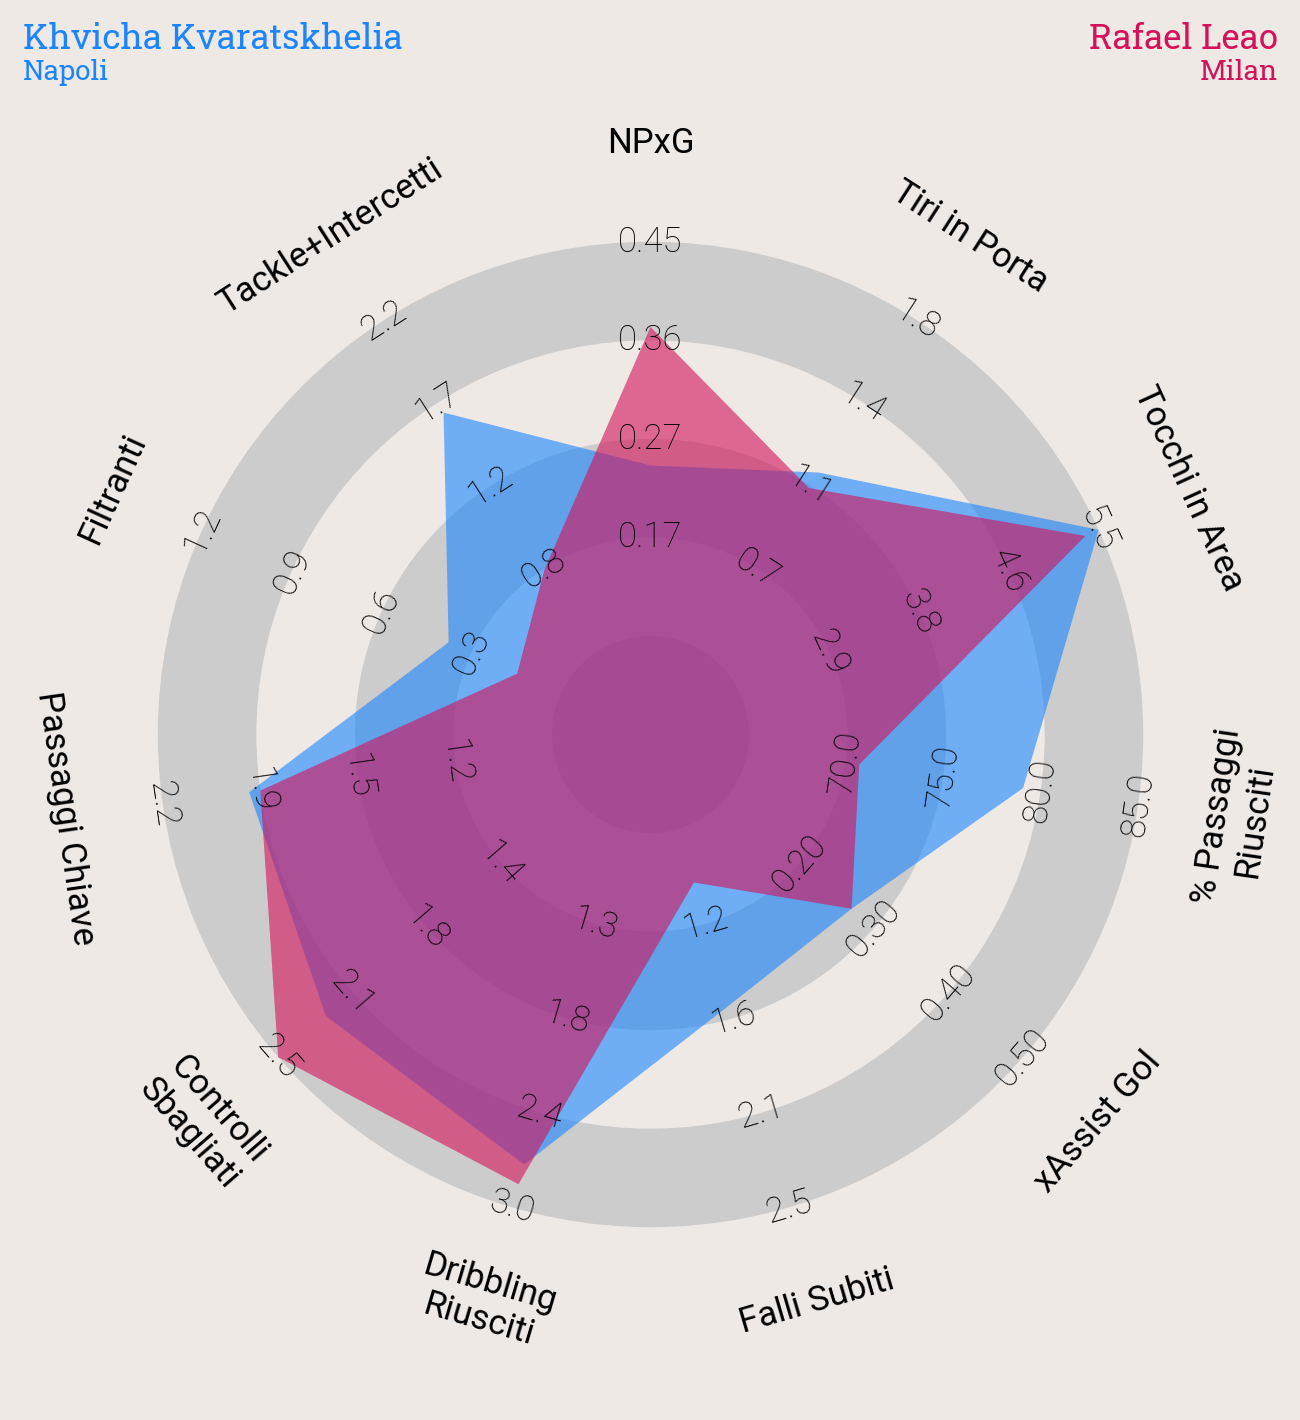

In [19]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'], facecolor='None')  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#cccccc')
radar_output = radar.draw_radar_compare(kvara_values, leao_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#1A85FF', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#D41159', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=font_normal.prop)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
title1_text = axs['title'].text(0.01, 0.65, 'Khvicha Kvaratskhelia', fontsize=25, color='#1A85FF',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Napoli', fontsize=20,
                                fontproperties=robotto_bold.prop,
                                ha='left', va='center', color='#1A85FF')
title3_text = axs['title'].text(0.99, 0.65, 'Rafael Leao', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#D41159')
title4_text = axs['title'].text(0.99, 0.25, 'Milan', fontsize=20,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#D41159')

fig.set_facecolor('#EFE9E6')

plt.savefig(
    "figures/Players/Player_Radar_Comparison_Kvara_Leao.png",
    dpi = 600,
    facecolor = "#EFE9E6",
    bbox_inches="tight",
    edgecolor="none",
    transparent = False
)

## Centrocampisti ##

In [20]:
# parameter list
params = [
    "NPxG", "Tiri", "Tiri in Porta",
    "Dribbling\nRiusciti\n", "Corse\nProgressive\n", "Controlli\nSbagliati\n", "\nPalloni\nPersi",
    "\nxAssist Gol\n", "\n\nPassaggi\nChiave\n", "\n\nPassaggi\nProgr.\n", "\n\nPassaggi\nTentati\n", "\n% Passaggi\n", "\n\nPassaggi\nnel 3° off.\n", "\n\n\nShot\nCreating\nActions\n",
    "\n\n% Dribbl.\nContrastati\n", "Duelli\nPersi\n", "Tackle\n+\nIntercetti\n\n", "Falli\nCommessi\n", "Recuperi\nPalla\n", "% Duelli\nAerei Vinti\n"
]

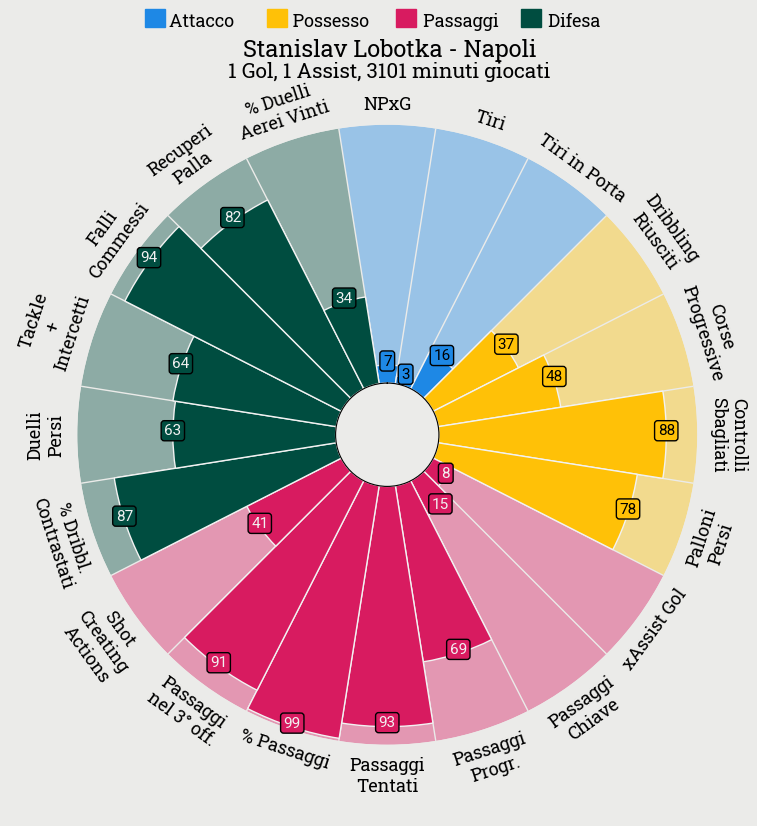

In [21]:
values = [
    7, 3, 16,
    37, 48, 88, 78,
    8, 15, 69, 93, 99, 91, 41,
    87, 63, 64, 94, 82, 34
]

slice_colors = ["#1E88E5"] * 3 + ["#FFC107"] * 4 + ["#D81B60"] * 7 + ["#004D40"] * 6
text_colors = ["#000000"] * 7 + ["#F2F2F2"] * 13


create_radar(values, "Centrocampisti", ["Stanislav", "Lobotka", "Napoli"], "1", "1", "3101", params, slice_colors, text_colors)

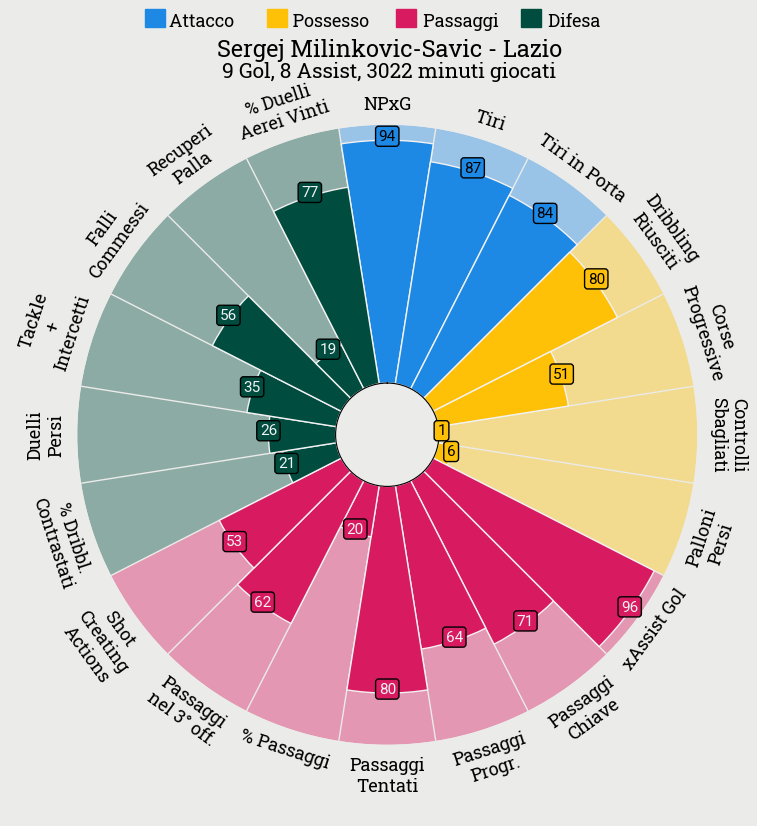

In [22]:

values = [
    94, 87, 84,
    80, 51, 1, 6,
    96, 71, 64, 80, 20, 62, 53,
    21, 26, 35, 56, 19, 77
]

slice_colors = ["#1E88E5"] * 3 + ["#FFC107"] * 4 + ["#D81B60"] * 7 + ["#004D40"] * 6
text_colors = ["#000000"] * 7 + ["#F2F2F2"] * 13


create_radar(values, "Centrocampisti", ["Sergej", "Milinkovic-Savic", "Lazio"], "9", "8", "3022", params, slice_colors, text_colors)

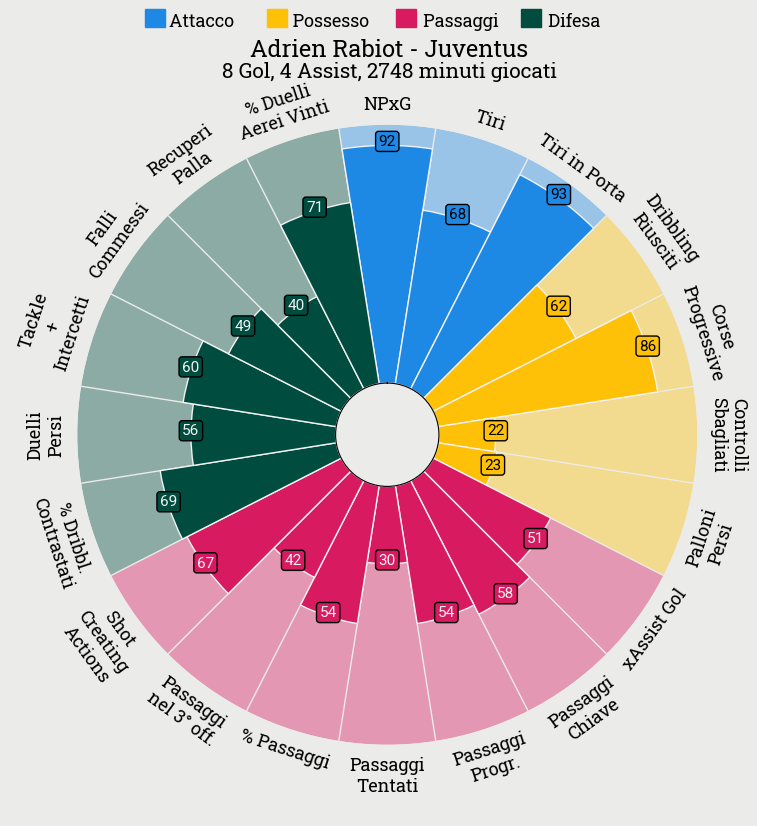

In [23]:

values = [
    92, 68, 93,
    62, 86, 22, 23,
    51, 58, 54, 30, 54, 42, 67,
    69, 56, 60, 49, 40, 71
]

slice_colors = ["#1E88E5"] * 3 + ["#FFC107"] * 4 + ["#D81B60"] * 7 + ["#004D40"] * 6
text_colors = ["#000000"] * 7 + ["#F2F2F2"] * 13


create_radar(values, "Centrocampisti", ["Adrien", "Rabiot", "Juventus"], "8", "4", "2748", params, slice_colors, text_colors)

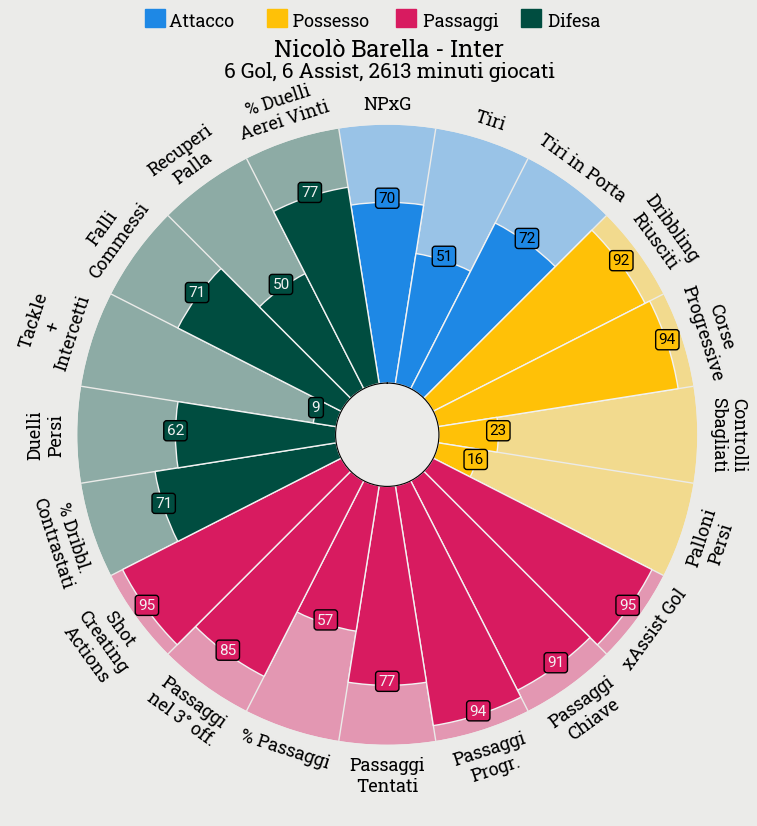

In [24]:
# parameter list
params = [
    "NPxG", "Tiri", "Tiri in Porta",
    "Dribbling\nRiusciti\n", "Corse\nProgressive\n", "Controlli\nSbagliati\n", "\nPalloni\nPersi",
    "\nxAssist Gol\n", "\n\nPassaggi\nChiave\n", "\n\nPassaggi\nProgr.\n", "\n\nPassaggi\nTentati\n", "\n% Passaggi\n", "\n\nPassaggi\nnel 3° off.\n", "\n\n\nShot\nCreating\nActions\n",
    "\n\n% Dribbl.\nContrastati\n", "Duelli\nPersi\n", "Tackle\n+\nIntercetti\n\n", "Falli\nCommessi\n", "Recuperi\nPalla\n", "% Duelli\nAerei Vinti\n"
]

values = [
    70, 51, 72,
    92, 94, 23, 16,
    95, 91, 94, 77, 57, 85, 95,
    71, 62, 9, 71, 50, 77
]

slice_colors = ["#1E88E5"] * 3 + ["#FFC107"] * 4 + ["#D81B60"] * 7 + ["#004D40"] * 6
text_colors = ["#000000"] * 7 + ["#F2F2F2"] * 13


create_radar(values, "Centrocampisti", ["Nicolò", "Barella", "Inter"], "6", "6", "2613", params, slice_colors, text_colors)

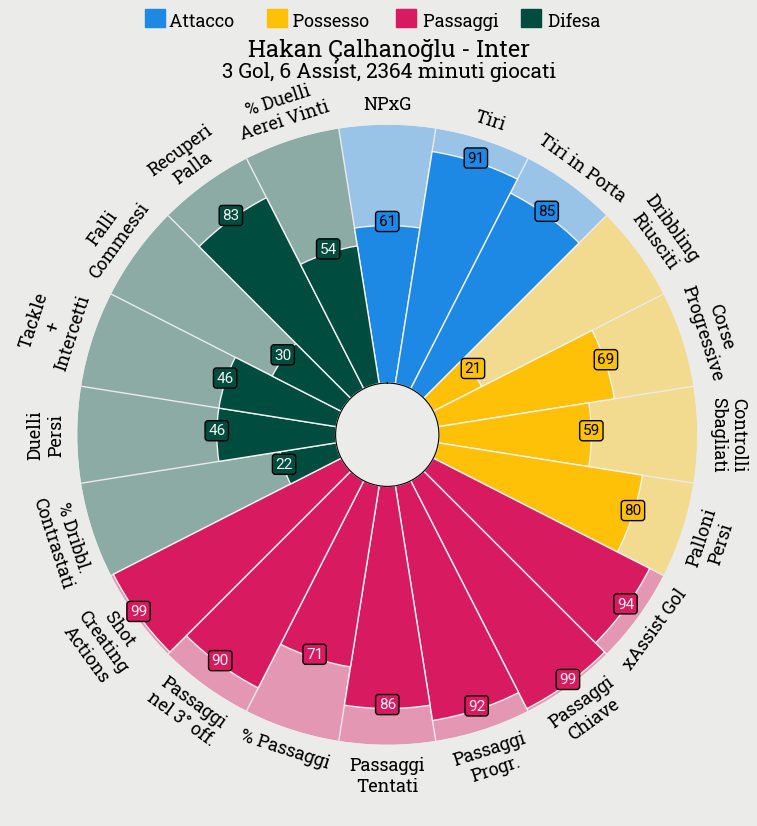

In [25]:

values = [
    61, 91, 85,
    21, 69, 59, 80,
    94, 99, 92, 86, 71, 90, 99,
    22, 46, 46, 30, 83, 54
]

slice_colors = ["#1E88E5"] * 3 + ["#FFC107"] * 4 + ["#D81B60"] * 7 + ["#004D40"] * 6
text_colors = ["#000000"] * 7 + ["#F2F2F2"] * 13


create_radar(values, "Centrocampisti", ["Hakan", "Çalhanoğlu", "Inter"], "3", "6", "2364", params, slice_colors, text_colors)

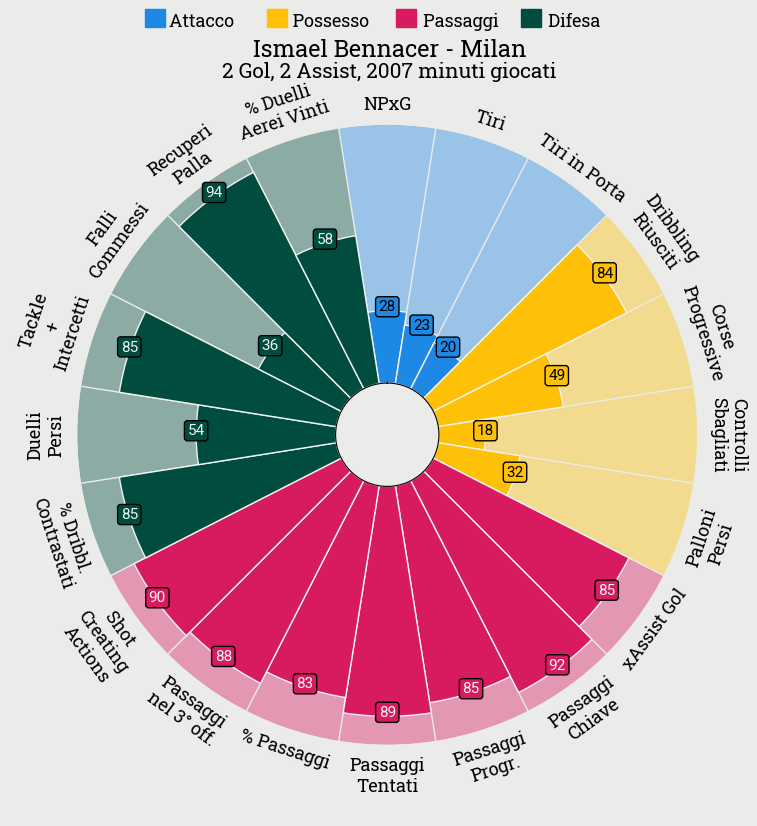

In [86]:

values = [
    28, 23, 20,
    84, 49, 18, 32,
    85, 92, 85, 89, 83, 88, 90,
    85, 54, 85, 36, 94, 58
]

slice_colors = ["#1E88E5"] * 3 + ["#FFC107"] * 4 + ["#D81B60"] * 7 + ["#004D40"] * 6
text_colors = ["#000000"] * 7 + ["#F2F2F2"] * 13


create_radar(values, "Centrocampisti", ["Ismael", "Bennacer", "Milan"], "2", "2", "2007", params, slice_colors, text_colors)

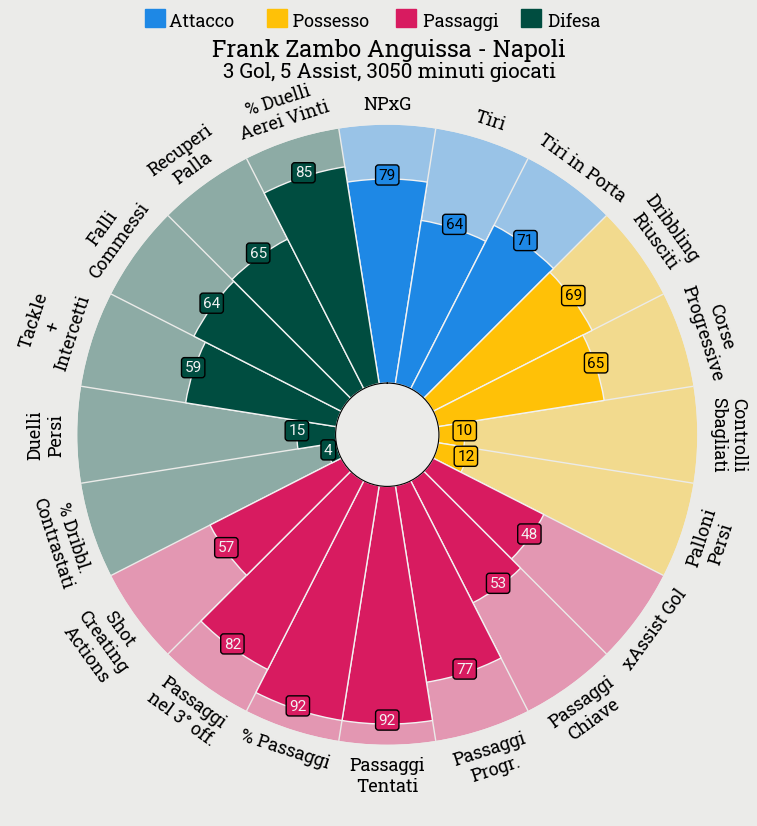

In [26]:

values = [
    79, 64, 71,
    69, 65, 10, 12,
    48, 53, 77, 92, 92, 82, 57,
    4, 15, 59, 64, 65, 85
]

slice_colors = ["#1E88E5"] * 3 + ["#FFC107"] * 4 + ["#D81B60"] * 7 + ["#004D40"] * 6
text_colors = ["#000000"] * 7 + ["#F2F2F2"] * 13


create_radar(values, "Centrocampisti", ["Frank", "Zambo Anguissa", "Napoli"], "3", "5", "3050", params, slice_colors, text_colors)

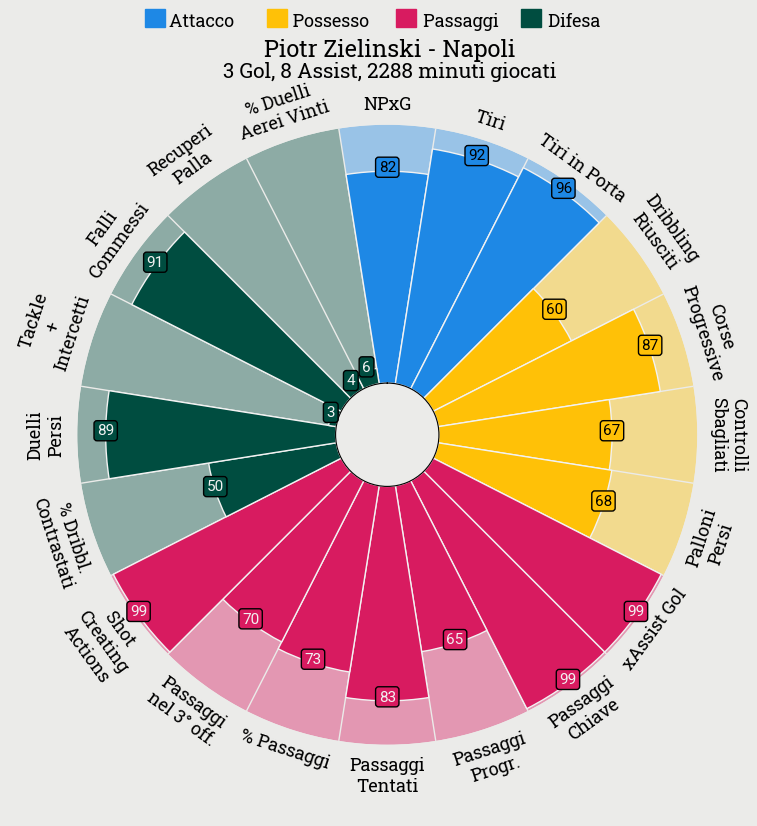

In [27]:

values = [
    82, 92, 96,
    60, 87, 67, 68,
    99, 99, 65, 83, 73, 70, 99,
    50, 89, 3, 91, 4, 6
]

slice_colors = ["#1E88E5"] * 3 + ["#FFC107"] * 4 + ["#D81B60"] * 7 + ["#004D40"] * 6
text_colors = ["#000000"] * 7 + ["#F2F2F2"] * 13


create_radar(values, "Centrocampisti", ["Piotr", "Zielinski", "Napoli"], "3", "8", "2288", params, slice_colors, text_colors)

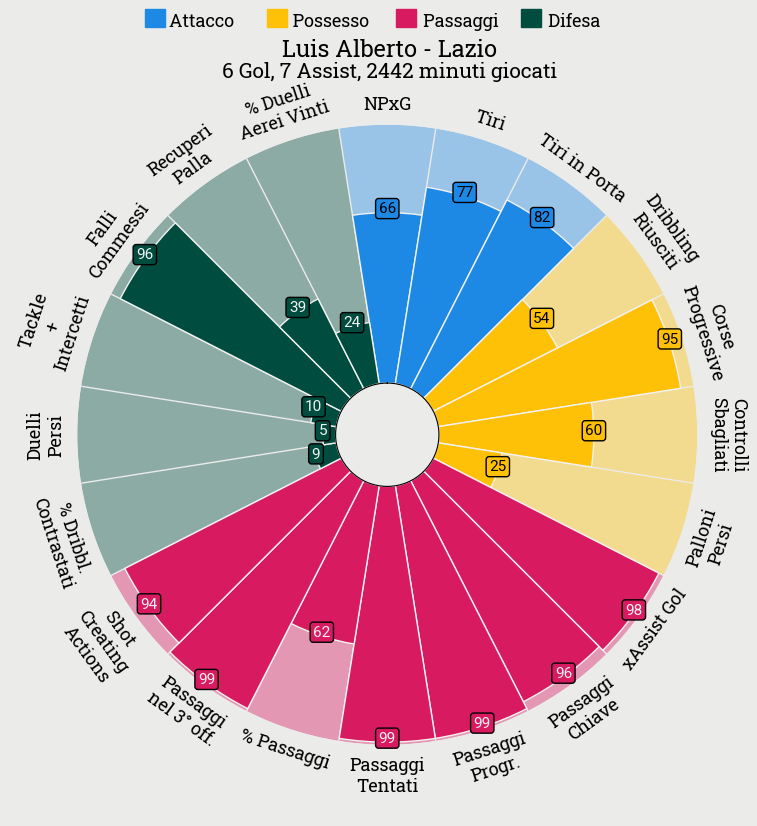

In [28]:

values = [
    66, 77, 82,
    54, 95, 60, 25,
    98, 96, 99, 99, 62, 99, 94,
    9, 5, 10, 96, 39, 24
]

slice_colors = ["#1E88E5"] * 3 + ["#FFC107"] * 4 + ["#D81B60"] * 7 + ["#004D40"] * 6
text_colors = ["#000000"] * 7 + ["#F2F2F2"] * 13


create_radar(values, "Centrocampisti", ["Luis", "Alberto", "Lazio"], "6", "7", "2442", params, slice_colors, text_colors)

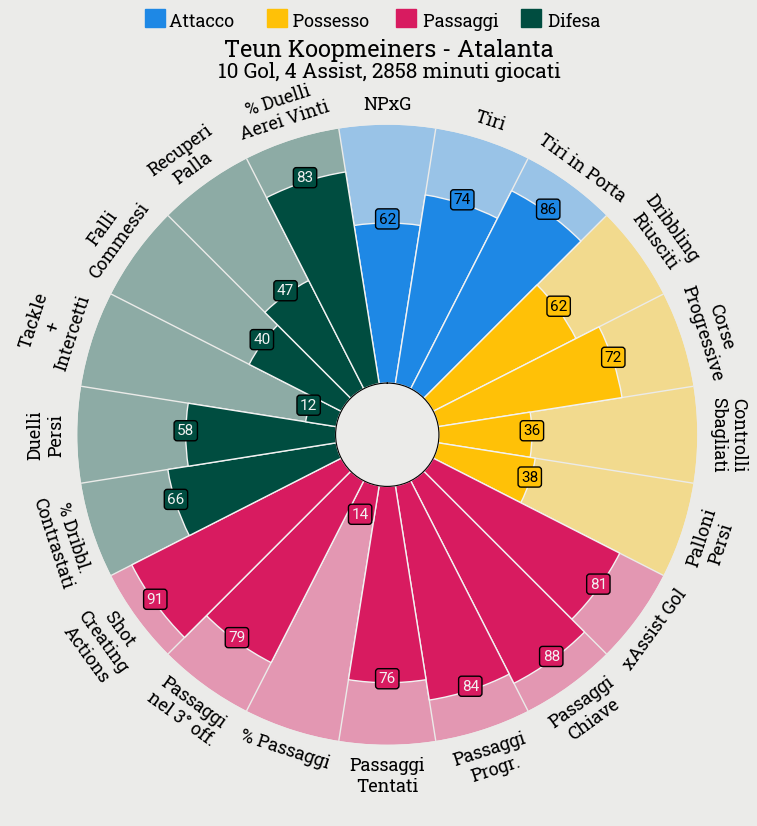

In [29]:
# parameter list
params = [
    "NPxG", "Tiri", "Tiri in Porta",
    "Dribbling\nRiusciti\n", "Corse\nProgressive\n", "Controlli\nSbagliati\n", "\nPalloni\nPersi",
    "\nxAssist Gol\n", "\n\nPassaggi\nChiave\n", "\n\nPassaggi\nProgr.\n", "\n\nPassaggi\nTentati\n", "\n% Passaggi\n", "\n\nPassaggi\nnel 3° off.\n", "\n\n\nShot\nCreating\nActions\n",
    "\n\n% Dribbl.\nContrastati\n", "Duelli\nPersi\n", "Tackle\n+\nIntercetti\n\n", "Falli\nCommessi\n", "Recuperi\nPalla\n", "% Duelli\nAerei Vinti\n"
]

values = [
    62, 74, 86,
    62, 72, 36, 38,
    81, 88, 84, 76, 14, 79, 91,
    66, 58, 12, 40, 47, 83
]

slice_colors = ["#1E88E5"] * 3 + ["#FFC107"] * 4 + ["#D81B60"] * 7 + ["#004D40"] * 6
text_colors = ["#000000"] * 7 + ["#F2F2F2"] * 13


create_radar(values, "Centrocampisti", ["Teun", "Koopmeiners", "Atalanta"], "10", "4", "2858", params, slice_colors, text_colors)

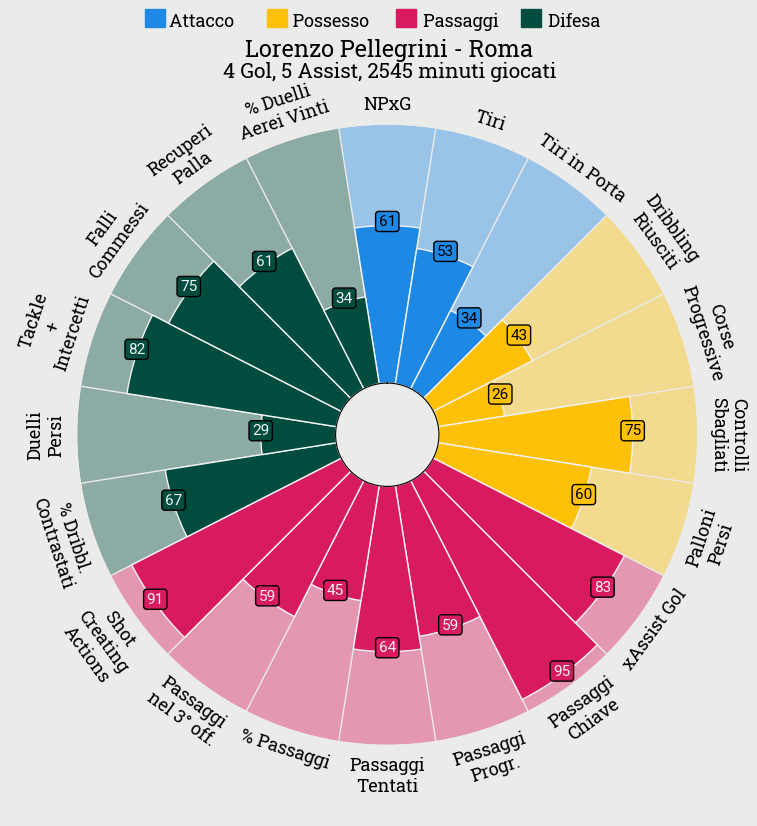

In [30]:

values = [
    61, 53, 34,
    43, 26, 75, 60,
    83, 95, 59, 64, 45, 59, 91,
    67, 29, 82, 75, 61, 34
]

slice_colors = ["#1E88E5"] * 3 + ["#FFC107"] * 4 + ["#D81B60"] * 7 + ["#004D40"] * 6
text_colors = ["#000000"] * 7 + ["#F2F2F2"] * 13


create_radar(values, "Centrocampisti", ["Lorenzo", "Pellegrini", "Roma"], "4", "5", "2545", params, slice_colors, text_colors)

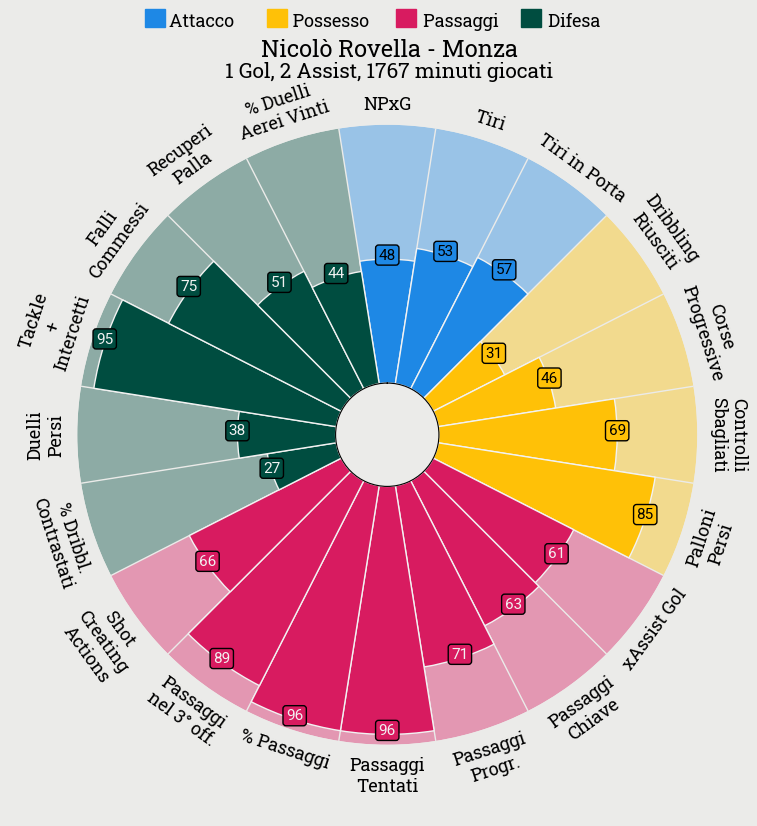

In [31]:
# parameter lista
params = [
    "NPxG", "Tiri", "Tiri in Porta",
    "Dribbling\nRiusciti\n", "Corse\nProgressive\n", "Controlli\nSbagliati\n", "\nPalloni\nPersi",
    "\nxAssist Gol\n", "\n\nPassaggi\nChiave\n", "\n\nPassaggi\nProgr.\n", "\n\nPassaggi\nTentati\n", "\n% Passaggi\n", "\n\nPassaggi\nnel 3° off.\n", "\n\n\nShot\nCreating\nActions\n",
    "\n\n% Dribbl.\nContrastati\n", "Duelli\nPersi\n", "Tackle\n+\nIntercetti\n\n", "Falli\nCommessi\n", "Recuperi\nPalla\n", "% Duelli\nAerei Vinti\n"
]

values = [
    48, 53, 57,
    31, 46, 69, 85,
    61, 63, 71, 96, 96, 89, 66,
    27, 38, 95, 75, 51, 44
]

slice_colors = ["#1E88E5"] * 3 + ["#FFC107"] * 4 + ["#D81B60"] * 7 + ["#004D40"] * 6
text_colors = ["#000000"] * 7 + ["#F2F2F2"] * 13


create_radar(values, "Centrocampisti", ["Nicolò", "Rovella", "Monza"], "1", "2", "1767", params, slice_colors, text_colors)

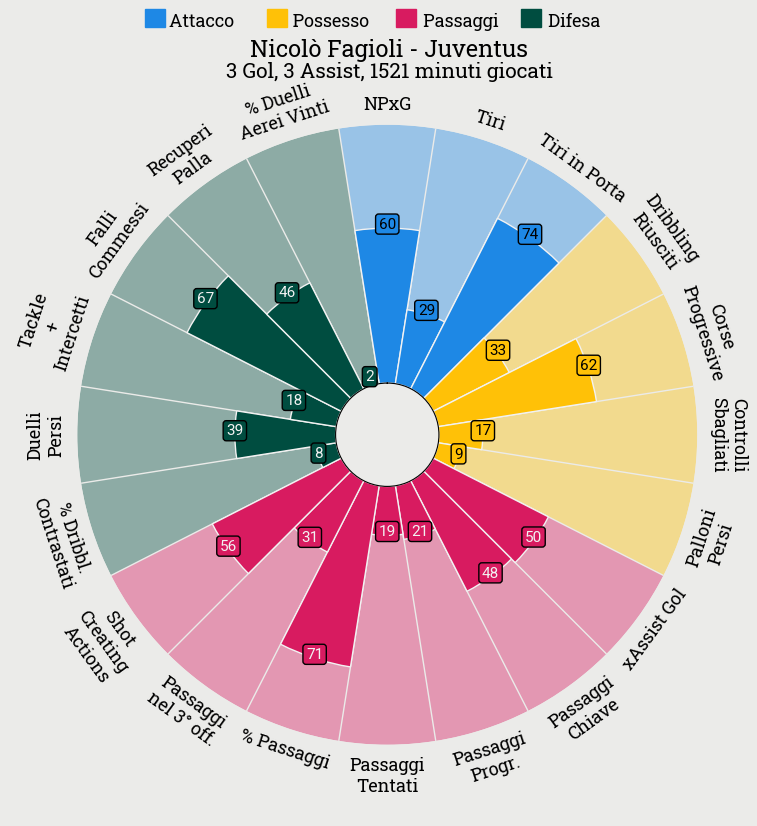

In [12]:
# parameter lista
params = [
    "NPxG", "Tiri", "Tiri in Porta",
    "Dribbling\nRiusciti\n", "Corse\nProgressive\n", "Controlli\nSbagliati\n", "\nPalloni\nPersi",
    "\nxAssist Gol\n", "\n\nPassaggi\nChiave\n", "\n\nPassaggi\nProgr.\n", "\n\nPassaggi\nTentati\n", "\n% Passaggi\n", "\n\nPassaggi\nnel 3° off.\n", "\n\n\nShot\nCreating\nActions\n",
    "\n\n% Dribbl.\nContrastati\n", "Duelli\nPersi\n", "Tackle\n+\nIntercetti\n\n", "Falli\nCommessi\n", "Recuperi\nPalla\n", "% Duelli\nAerei Vinti\n"
]

values = [
    60, 29, 74,
    33, 62, 17, 9,
    50, 48, 21, 19, 71, 31, 56,
    8, 39, 18, 67, 46, 2
]

slice_colors = ["#1E88E5"] * 3 + ["#FFC107"] * 4 + ["#D81B60"] * 7 + ["#004D40"] * 6
text_colors = ["#000000"] * 7 + ["#F2F2F2"] * 13


create_radar(values, "Centrocampisti", ["Nicolò", "Fagioli", "Juventus"], "3", "3", "1521", params, slice_colors, text_colors)